# **French Noun Gender Classification in Word Embeddings: SHAP & LIME Analysis on a Perceptron Model**

## Install gdown

In [ ]:
!pip install gdown

## Download Camem-BERT Embeddings with Noun Genders

* Camem-BERT Embeddings with French Noun Genders

* https://drive.google.com/file/d/1u39fPDJYqPHmZSdPflzn3zXtBKZjx9vY/view?usp=sharing

In [ ]:
import gdown

file_id = "1u39fPDJYqPHmZSdPflzn3zXtBKZjx9vY"  # Extracted from link
output = "camem_bert_embeddings_with_noun_gender.csv"  # File name
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1u39fPDJYqPHmZSdPflzn3zXtBKZjx9vY
From (redirected): https://drive.google.com/uc?id=1u39fPDJYqPHmZSdPflzn3zXtBKZjx9vY&confirm=t&uuid=d1bdedd1-a800-4946-a555-f5d5a017531d
To: /content/my_file.csv
100%|██████████| 2.72G/2.72G [00:43<00:00, 62.4MB/s]


'my_file.csv'

## Dataset Head

In [ ]:
import pandas as pd

# Display the head of the DataFrame
df = pd.read_csv("camem_bert_embeddings_with_noun_gender.csv")

display(df.head())

,Word,Embedding,Gender
0,a b c,"[-0.03363805636763573,0.18951943516731262,-0.0...",1
1,a demi-mot,"[-0.06961638480424881,0.11719649285078049,0.00...",1
2,a-mi-la,"[-0.055688682943582535,0.05570295825600624,-0....",1
3,aabam,"[0.01503327488899231,0.16362543404102325,0.026...",1
4,aalénien,"[-0.07107880711555481,0.05070320889353752,-0.0...",1


**Check the length of the embeddings**

In [ ]:
# Extract the first embedding and check its length
embedding_length = len(eval(df['Embedding'].iloc[0]))

print(f"Embedding Length: {embedding_length} dimensions")

Embedding Length: 768 dimensions


## Dataset Exploration

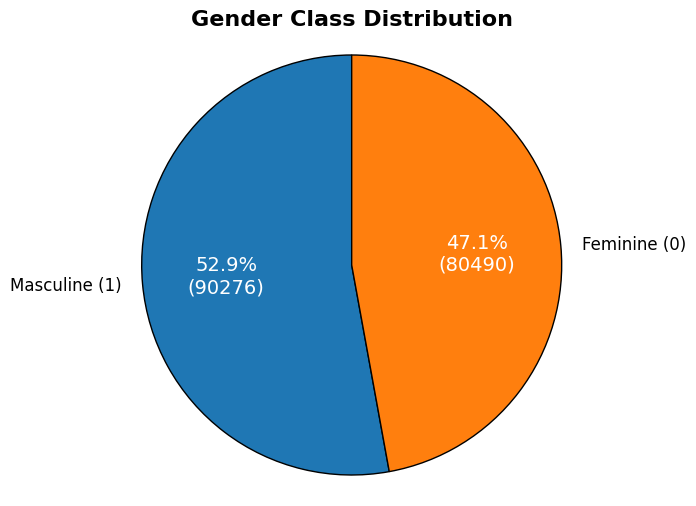

In [ ]:
import matplotlib.pyplot as plt

# Ensure the dataset is loaded and mapped correctly
gender_labels = {1: "Masculine (1)", 0: "Feminine (0)"}
df['Gender_Label'] = df['Gender'].map(gender_labels)

# Calculate gender distribution
gender_counts = df['Gender_Label'].value_counts()

# Function to format labels with count and percentage
def label_format(pct, all_vals):
    absolute = int(round(pct/100. * sum(all_vals)))  # Calculate absolute count
    return f"{pct:.1f}%\n({absolute})"  # Display percentage and count

# Create the pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct=lambda pct: label_format(pct, gender_counts),  # Apply formatting function
    startangle=90,
    wedgeprops={'edgecolor': 'black'},  # Improve visibility
    textprops={'fontsize': 12}  # Set font size
)

# Improve text visibility
for text in autotexts:
    text.set_color('white')
    text.set_fontsize(14)

plt.title('Gender Class Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio to ensure a circular pie chart

# Show the pie chart
plt.show()


In [ ]:
# Display 10 examples for each gender
examples_per_gender = df.groupby('Gender').head(10)

# Display the table
from IPython.display import display
display(examples_per_gender)

,Word,Embedding,Gender,Gender_Label
0,a b c,"[-0.03363805636763573,0.18951943516731262,-0.0...",1,Masculine (1)
1,a demi-mot,"[-0.06961638480424881,0.11719649285078049,0.00...",1,Masculine (1)
2,a-mi-la,"[-0.055688682943582535,0.05570295825600624,-0....",1,Masculine (1)
3,aabam,"[0.01503327488899231,0.16362543404102325,0.026...",1,Masculine (1)
4,aalénien,"[-0.07107880711555481,0.05070320889353752,-0.0...",1,Masculine (1)
5,aaléniens,"[-0.02594040334224701,0.07717090100049973,-0.0...",1,Masculine (1)
6,aba,"[-0.009327867068350315,0.27434393763542175,0.0...",1,Masculine (1)
7,abaca,"[-0.05669710785150528,0.3120356500148773,-0.06...",1,Masculine (1)
8,abacas,"[-0.053496845066547394,0.2737475335597992,-0.1...",1,Masculine (1)
9,abacule,"[-0.029825951904058456,0.0692121610045433,-0.1...",1,Masculine (1)


## Test a Simple Perceptron on a Subset of Dataset

1. Load and Prepare the Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# Ensure the dataset is already loaded as df
if 'df' not in globals():
    raise NameError("Dataset 'df' is not defined. Please load it before running this code.")

# Select 1000 examples from each gender class
sampled_df = df.groupby('Gender').apply(lambda x: x.sample(n=1000, random_state=42)).reset_index(drop=True)

<ipython-input-26-434981d7922a>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('Gender').apply(lambda x: x.sample(n=1000, random_state=42)).reset_index(drop=True)


2. Extract Features and Labels

In [ ]:
# Convert embeddings from string format to numerical arrays
X = np.vstack(sampled_df['Embedding'].apply(eval).values)
y = sampled_df['Gender'].values  # Gender labels (0 = Feminine, 1 = Masculine)

3. Split the Dataset into Train and Test Sets

In [ ]:
# 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

4. Normalize the Feature Data

In [ ]:
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

5. Train a Simple Perceptron Model

In [ ]:
# Initialize and train the Perceptron model
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

6. Evaluate the Model Performance

In [ ]:
# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

print(f"Perceptron Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

Perceptron Accuracy: 0.8325

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       200
           1       0.84      0.81      0.83       200

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



## Applying SHAP to Understand Global Feature Importance

* Which dimensions in the 768-dimensional embeddings are most important for classification.
* The positive or negative impact of each dimension.

PermutationExplainer explainer: 401it [10:13,  1.53s/it]


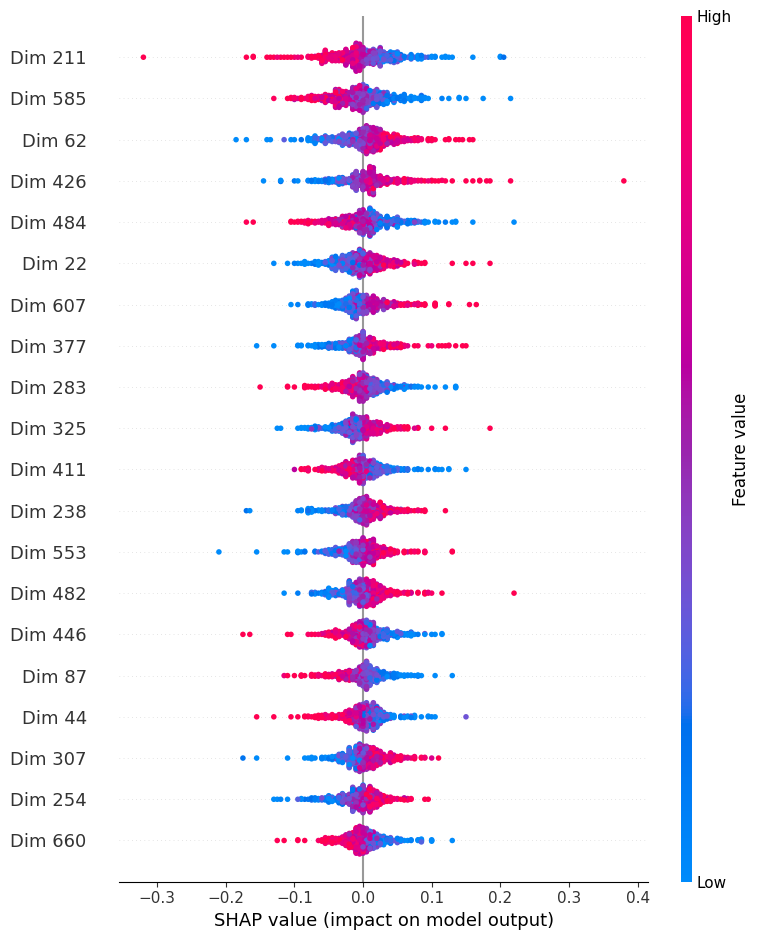

In [ ]:
import shap

# Create SHAP explainer with max_evals
explainer = shap.Explainer(perceptron.predict, X_test)

# Compute SHAP values
shap_values = explainer(X_test, max_evals=1600)  # Set a higher (2x+1) evaluation limit than embeddings length (768)

# Plot feature importance
shap.summary_plot(shap_values, X_test, feature_names=[f"Dim {i}" for i in range(768)])


## Apply LIME for Local Explanation

* How a specific word's embedding leads to a masculine (1) or feminine (0) classification.
* The percentage contribution of each dimension in individual predictions.

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c808a8d15d002ce6de525199fd9ed4c88a64e5aea9f3db7365d0e7dbfc9672e4
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


### Test LIME on a single word

In [ ]:
import lime
import lime.lime_tabular
import numpy as np

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=[f"Dim {i}" for i in range(768)],
    class_names=["Feminine", "Masculine"],
    mode="classification"
)

# Pick a test instance (e.g., first example)
test_instance = X_test[0].reshape(1, -1)

# Define a wrapper function for LIME
def perceptron_predict(X):
    return np.column_stack([(perceptron.decision_function(X) > 0).astype(int),
                            (perceptron.decision_function(X) <= 0).astype(int)])

# Explain the prediction for this instance
exp = explainer.explain_instance(test_instance[0], perceptron_predict)

# Show the explanation
exp.show_in_notebook()


### Test LIME on 100 words to get top 20 contributing dimensions

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
from collections import Counter
import re  # Import regex module

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=[f"Dim {i}" for i in range(768)],
    class_names=["Feminine", "Masculine"],
    mode="classification"
)

# Function to apply LIME to multiple words
top_features = Counter()

for i in range(min(100, len(X_test))):  # Test on first 100 words (words length is adjustable)
    test_instance = X_test[i].reshape(1, -1)

    def perceptron_predict(X):
        return np.column_stack([(perceptron.decision_function(X) > 0).astype(int),
                                (perceptron.decision_function(X) <= 0).astype(int)])

    # Explain instance
    exp = explainer.explain_instance(test_instance[0], perceptron_predict)

    # Collect important features
    for feature, weight in exp.as_list():
        # Extract numerical dimension index using regex
        match = re.search(r'\d+', feature)
        if match:
            dim_index = int(match.group())  # Extract numeric part
            top_features[dim_index] += abs(weight)  # Store absolute importance (handle negative LIME value)

# Convert to sorted list of most important features
sorted_features = sorted(top_features.items(), key=lambda x: x[1], reverse=True)

# Display top 20 most important dimensions
print("Top 20 most important dimensions across multiple words:")
for dim, importance in sorted_features[:20]:
    print(f"Dim {dim}: {importance:.3f}")


Top 20 most important dimensions across multiple words:
Dim 211: 3.280
Dim 62: 2.681
Dim 585: 2.535
Dim 22: 2.375
Dim 484: 2.236
Dim 426: 2.139
Dim 238: 1.720
Dim 482: 1.481
Dim 411: 1.390
Dim 377: 1.177
Dim 307: 1.165
Dim 283: 1.131
Dim 115: 1.130
Dim 87: 1.101
Dim 553: 0.990
Dim 107: 0.990
Dim 480: 0.978
Dim 607: 0.971
Dim 68: 0.927
Dim 516: 0.872


## Extract & Compare SHAP and LIME High-Impact Dimensions

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

# Calculate mean absolute SHAP value for each dimension
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Get top 20 dimensions from SHAP with their importance scores
top_shap_dimensions = sorted(
    [(dim, shap_importance[dim]) for dim in np.argsort(shap_importance)[-20:]],
    key=lambda x: x[1], reverse=True
)

# Get top 20 dimensions from LIME with their importance scores
sorted_lime_features = sorted(top_features.items(), key=lambda x: x[1], reverse=True)
top_lime_dimensions = sorted_lime_features[:20]

# Extract just the dimension indices
top_shap_indices = [dim[0] for dim in top_shap_dimensions]
top_lime_indices = [dim[0] for dim in top_lime_dimensions]

# Find matching dimensions between SHAP and LIME
matching_dimensions = list(set(top_shap_indices) & set(top_lime_indices))

# Find dimensions unique to each method
unique_to_shap = list(set(top_shap_indices) - set(top_lime_indices))
unique_to_lime = list(set(top_lime_indices) - set(top_shap_indices))

# Prepare data for table with importance scores
comparison_data = []
for dim in sorted(set(top_shap_indices + top_lime_indices)):
    shap_score = next((s[1] for s in top_shap_dimensions if s[0] == dim), 0.0)  # Replace NaN with 0.0
    lime_score = next((l[1] for l in top_lime_dimensions if l[0] == dim), 0.0)  # Replace NaN with 0.0
    overall_importance = shap_score + lime_score  # Combine SHAP & LIME importance scores
    comparison_data.append({
        "Dimension": dim,
        "SHAP Importance": shap_score,
        "LIME Importance": lime_score,
        "Overall Importance": overall_importance  # New column
    })

# Create DataFrame for display
comparison_table = pd.DataFrame(comparison_data)

# Sort by Overall Importance (descending order)
comparison_table = comparison_table.sort_values(by="Overall Importance", ascending=False)

# Display the comparison table
from IPython.display import display
print("\nSHAP & LIME Feature Comparison Table:")
display(comparison_table)




SHAP & LIME Feature Comparison Table:


,Dimension,SHAP Importance,LIME Importance,Overall Importance
7,211,0.035188,3.280233,3.315420
2,62,0.032488,2.681485,2.713973
22,585,0.032587,2.535049,2.567636
0,22,0.027487,2.375404,2.402892
19,484,0.030488,2.236443,2.266930
15,426,0.031425,2.139282,2.170707
8,238,0.023525,1.720006,1.743531
18,482,0.022962,1.480601,1.503564
14,411,0.023762,1.390037,1.413799
13,377,0.025487,1.177291,1.202779


### Extract High-Impact Dimensions Based on SHAP and LIME Importance

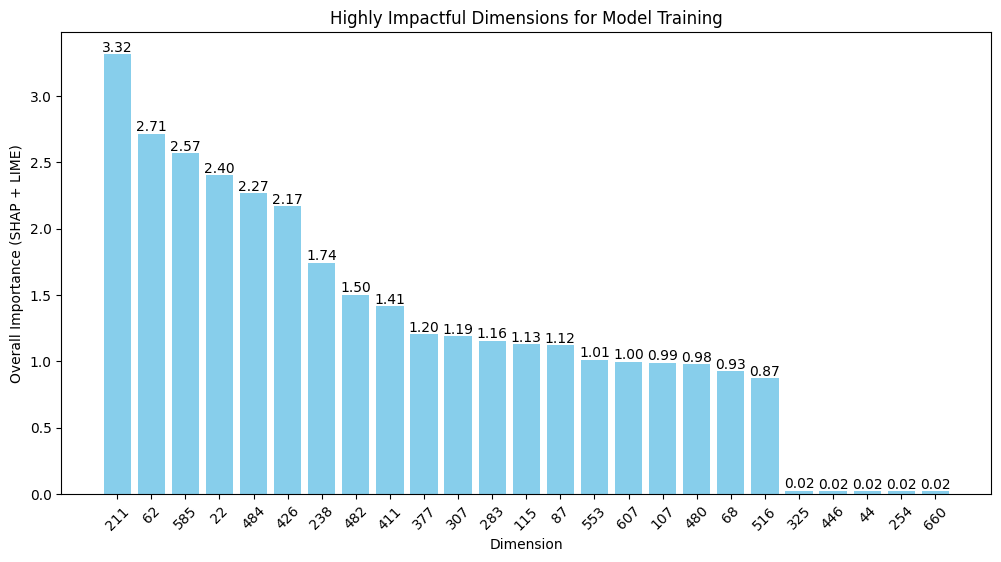


Highly Impactful Dimensions Based on SHAP and LIME Importance:
[211, 62, 585, 22, 484, 426, 238, 482, 411, 377, 307, 283, 115, 87, 553, 607, 107, 480, 68, 516, 325, 446, 44, 254, 660]


In [ ]:
import matplotlib.pyplot as plt

# Prioritize matching dimensions & strongest unique dimensions
high_impact_dimensions = matching_dimensions + unique_to_shap[:5] + unique_to_lime[:5]

# Store highly impactful dimensions with their importance scores
high_impact_data = []
for dim in high_impact_dimensions:
    shap_score = next((s[1] for s in top_shap_dimensions if s[0] == dim), 0.0)  # Replace NaN with 0.0
    lime_score = next((l[1] for l in top_lime_dimensions if l[0] == dim), 0.0)  # Replace NaN with 0.0
    overall_importance = shap_score + lime_score  # Sum SHAP & LIME scores
    high_impact_data.append({"Dimension": dim, "Overall Importance": overall_importance})

# Convert to DataFrame and sort by Overall Importance
high_impact_df = pd.DataFrame(high_impact_data).sort_values(by="Overall Importance", ascending=False)

# Store the top impactful dimensions for later Perceptron training
selected_dimensions = high_impact_df["Dimension"].tolist()

# Plot Bar Chart of Highly Impactful Dimensions
plt.figure(figsize=(12, 6))
plt.bar(high_impact_df["Dimension"].astype(str), high_impact_df["Overall Importance"], color="skyblue")
plt.xlabel("Dimension")
plt.ylabel("Overall Importance (SHAP + LIME)")
plt.title("Highly Impactful Dimensions for Model Training")

# Add data labels above bars
for i, value in enumerate(high_impact_df["Overall Importance"]):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)

plt.xticks(rotation=45)
plt.show()

# Print highly-impactful dimensions
print("\nHighly Impactful Dimensions Based on SHAP and LIME Importance:")
print(selected_dimensions)

## Retraining Perceptron with High-Impact Selected Dimensions & Comparing Results

1. Load and Prepare the Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# Ensure the dataset is already loaded as df
if 'df' not in globals():
    raise NameError("Dataset 'df' is not defined. Please load it before running this code.")

# Select 1000 examples from each gender class
sampled_df = df.groupby('Gender').apply(lambda x: x.sample(n=1000, random_state=42)).reset_index(drop=True)

<ipython-input-65-434981d7922a>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('Gender').apply(lambda x: x.sample(n=1000, random_state=42)).reset_index(drop=True)


2. Extract Features and Labels

In [ ]:
# Convert embeddings from string format to numerical arrays
X = np.vstack(sampled_df['Embedding'].apply(eval).values)
y = sampled_df['Gender'].values  # Gender labels (0 = Feminine, 1 = Masculine)

3. Extract only the selected impactful dimensions

In [ ]:
X_selected = X[:, selected_dimensions]  # Use only selected dimensions


4. Split the Dataset into Train and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

5. Normalize the selected feature data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

6. Train a new Perceptron model with selected dimensions

In [ ]:
perceptron_selected = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron_selected.fit(X_train, y_train)

Perceptron(random_state=42)

7. Evaluate the New Perceptron Performance

In [ ]:
# Evaluate the new Perceptron model
y_pred_selected = perceptron_selected.predict(X_test)

# Compute accuracy
accuracy_selected = accuracy_score(y_test, y_pred_selected)

# Generate classification report
report_selected = classification_report(y_test, y_pred_selected)

print(f"Perceptron Accuracy (Selected Features): {accuracy_selected:.4f}")
print("\nClassification Report (Selected Features):\n", report_selected)

Perceptron Accuracy (Selected Features): 0.6650

Classification Report (Selected Features):
               precision    recall  f1-score   support

           0       0.67      0.65      0.66       200
           1       0.66      0.68      0.67       200

    accuracy                           0.67       400
   macro avg       0.67      0.67      0.66       400
weighted avg       0.67      0.67      0.66       400



8. Compare the New Perceptron (25 Dimensinos) with the Previous Perceptron (768 Dimensions) Results


Comparison with Previous Perceptron:
Previous Perceptron (768 Dimensions) Accuracy: 0.8325
New Perceptron (25 Dimensions) Accuracy (Selected Features): 0.6650


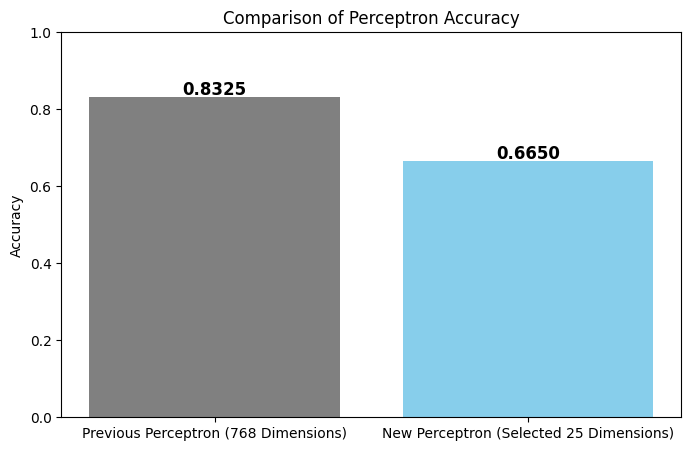

In [ ]:
import matplotlib.pyplot as plt

print("\nComparison with Previous Perceptron:")
print(f"Previous Perceptron (768 Dimensions) Accuracy: {accuracy:.4f}")
print(f"New Perceptron (25 Dimensions) Accuracy (Selected Features): {accuracy_selected:.4f}")

# Data for visualization
models = ["Previous Perceptron (768 Dimensions)", "New Perceptron (Selected 25 Dimensions)"]
accuracies = [accuracy, accuracy_selected]

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=["gray", "skyblue"])

# Add data labels
for i, value in enumerate(accuracies):
    plt.text(i, value + 0.005, f"{value:.4f}", ha='center', fontsize=12, fontweight='bold')

# Labels and title
plt.ylabel("Accuracy")
plt.title("Comparison of Perceptron Accuracy")

# Show the plot
plt.ylim(0, 1)  # Ensure the y-axis is between 0 and 1 for proper scale
plt.show()
